In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_excel('/content/ASOW-2.xlsx')
df = df.drop(labels=0, axis=0)
df

,longitude,latitude,time,station,wmo_platform_code,T_25
1,0.0,0.0,2015-05-23T12:00:00Z,0n0e,13010.0,27.89
2,0.0,0.0,2015-05-24T12:00:00Z,0n0e,13010.0,27.5
3,0.0,0.0,2015-05-25T12:00:00Z,0n0e,13010.0,27.44
4,0.0,0.0,2015-05-26T12:00:00Z,0n0e,13010.0,27.4
5,0.0,0.0,2015-05-27T12:00:00Z,0n0e,13010.0,27.66
...,...,...,...,...,...,...
932,220.0,9.0,2015-05-27T12:00:00Z,9n140w,51006.0,28.486673
933,220.0,9.0,2015-05-28T12:00:00Z,9n140w,51006.0,28.557467
934,220.0,9.0,2015-05-29T12:00:00Z,9n140w,51006.0,28.390596
935,220.0,9.0,2015-05-30T12:00:00Z,9n140w,51006.0,28.174444


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 1 to 936
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   longitude          936 non-null    object 
 1   latitude           936 non-null    object 
 2   time               936 non-null    object 
 3   station            936 non-null    object 
 4   wmo_platform_code  936 non-null    float64
 5   T_25               802 non-null    object 
dtypes: float64(1), object(5)
memory usage: 44.0+ KB


In [30]:
df.drop('station',axis=1,inplace=True) #basically same info with colname: WMO_platform_code

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.nunique()

,0
longitude,26
latitude,22
time,9
wmo_platform_code,104
T_25,669


In [33]:
df.isna().sum()

,0
longitude,0
latitude,0
time,0
wmo_platform_code,0
T_25,134


In [34]:
df['time'] = pd.to_datetime(df['time'])
df['T_25'] = pd.to_numeric(df['T_25'])

In [35]:
df.groupby('time').count().head()

,longitude,latitude,wmo_platform_code,T_25
time,,,,
2015-05-23 12:00:00+00:00,104,104,104,90
2015-05-24 12:00:00+00:00,104,104,104,89
2015-05-25 12:00:00+00:00,104,104,104,89
2015-05-26 12:00:00+00:00,104,104,104,89
2015-05-27 12:00:00+00:00,104,104,104,89


In [36]:
df['year'] = pd.DatetimeIndex(df['time']).year
df['month'] = pd.DatetimeIndex(df['time']).month
df['day'] = pd.DatetimeIndex(df['time']).day
df['hour'] = pd.DatetimeIndex(df['time']).hour
df

,longitude,latitude,time,wmo_platform_code,T_25,year,month,day,hour
1,0.0,0.0,2015-05-23 12:00:00+00:00,13010.0,27.890000,2015,5,23,12
2,0.0,0.0,2015-05-24 12:00:00+00:00,13010.0,27.500000,2015,5,24,12
3,0.0,0.0,2015-05-25 12:00:00+00:00,13010.0,27.440000,2015,5,25,12
4,0.0,0.0,2015-05-26 12:00:00+00:00,13010.0,27.400000,2015,5,26,12
5,0.0,0.0,2015-05-27 12:00:00+00:00,13010.0,27.660000,2015,5,27,12
...,...,...,...,...,...,...,...,...,...
932,220.0,9.0,2015-05-27 12:00:00+00:00,51006.0,28.486673,2015,5,27,12
933,220.0,9.0,2015-05-28 12:00:00+00:00,51006.0,28.557467,2015,5,28,12
934,220.0,9.0,2015-05-29 12:00:00+00:00,51006.0,28.390596,2015,5,29,12
935,220.0,9.0,2015-05-30 12:00:00+00:00,51006.0,28.174444,2015,5,30,12


<Axes: xlabel='Temperature of the day', ylabel='Day'>

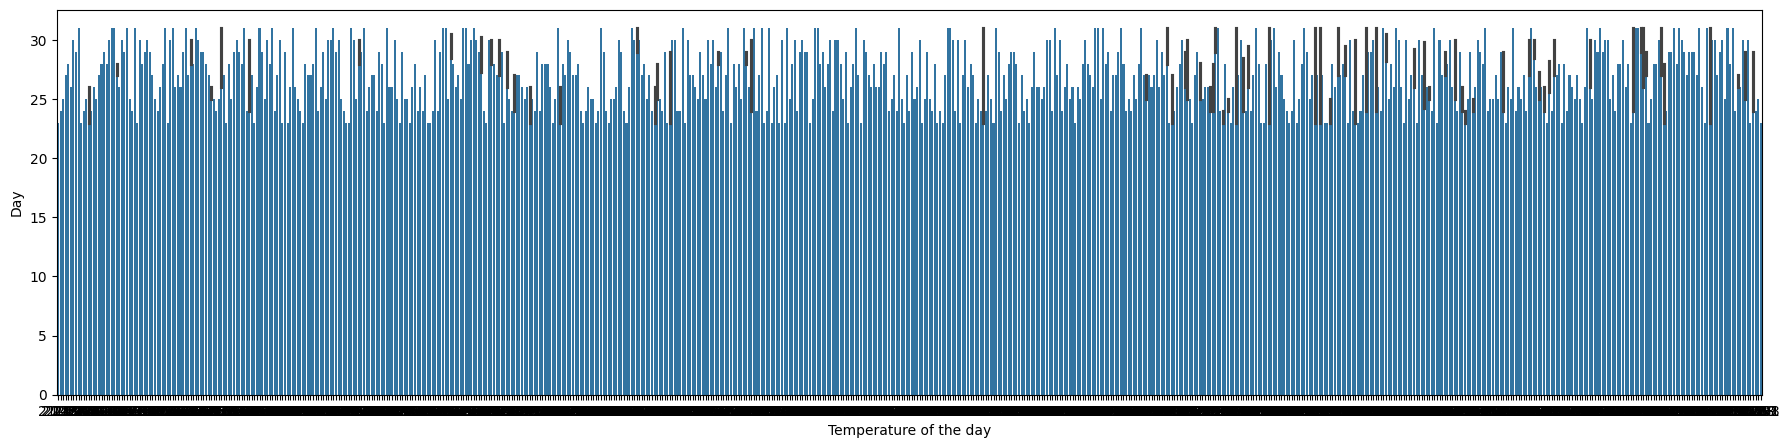

In [37]:
plt.figure(figsize=(22,5))
plt.ylabel('Day')
plt.xlabel('Temperature of the day')
sns.barplot(x=df['T_25'], y=df['day'])

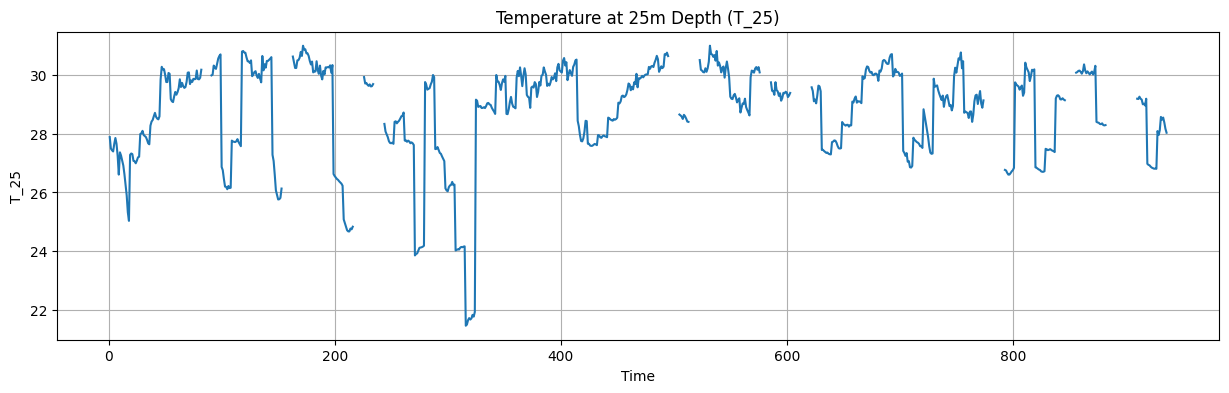

In [38]:
df['T_25'].plot(figsize=(15, 4), title="Temperature at 25m Depth (T_25)")
plt.xlabel("Time")
plt.ylabel("T_25")
plt.grid(True)
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_1 = df.drop(['year','month','day','hour','time'], axis = 1)
df_2 = df[['year','month','day','hour','time']]

df_1_scaled = scaler.fit_transform(df_1)
df_1_scaled = pd.DataFrame(df_1_scaled, columns = df_1.columns)

df = pd.concat([df_1_scaled, df_2], axis = 1)

In [40]:
from sklearn.impute import KNNImputer
df1 = df.drop('time',axis=1)

imputer = KNNImputer(n_neighbors=5)
df1 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)
df = pd.concat([df1,df['time']],axis=1)

In [41]:
df.isna().sum()

,0
longitude,0
latitude,0
wmo_platform_code,0
T_25,0
year,0
month,0
day,0
hour,0
time,1


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

ts = df["T_25"]

scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts.values.reshape(-1, 1)).flatten()

In [43]:
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 20
if window_size >= len(ts_scaled):
    window_size = len(ts_scaled) - 1
    print(f"Warning: window size too large, adjusted to {window_size}")

In [44]:
X, y = create_sequences(ts_scaled, window_size)

train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.1)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val     = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test   = X[train_size + val_size:], y[train_size + val_size:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val   = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [45]:
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2106 - val_loss: 0.0175
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - val_loss: 0.0117
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - val_loss: 0.0112
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - val_loss: 0.0105
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - val_loss: 0.0097
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - val_loss: 0.0091
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - val_loss: 0.0081
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - val_loss: 0.0111
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0108 - val_loss: 0.0096
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - val_loss: 0.0069
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - val_loss: 0.0071
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - val_loss: 0.0064

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030
Test loss: 0.0031584841199219227
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


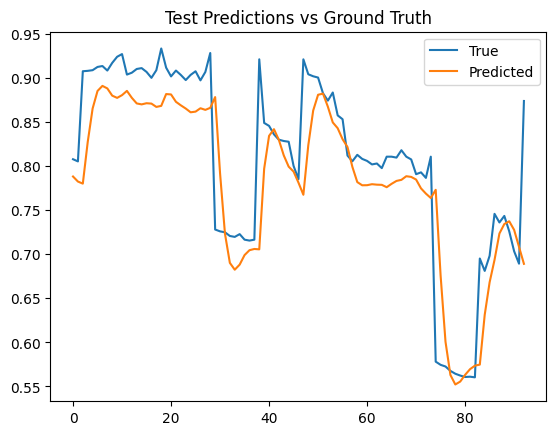

In [46]:
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

y_pred = model.predict(X_test)
plt.plot(y_test, label="True")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Test Predictions vs Ground Truth")
plt.show()